In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def SNR(original, noise):
    import math
    height, width = original.shape
    # Normalize
    ori_normalized = original / 255
    noise_normalized = noise / 255
    # VS
    us = np.sum(ori_normalized) / (height * width)
    temp1 = 0
    temp2 = 0
    for i in range(height):
        for j in range(width):
            temp1 += (ori_normalized[i][j] - us)**2
            temp2 += (noise_normalized[i][j] - ori_normalized[i][j])
    VS = temp1 / (height * width)
    # VN
    unoise = temp2 / (height * width)
    temp = 0
    for i in range(height):
        for j in range(width):
            temp += (noise_normalized[i][j] - ori_normalized[i][j] - unoise)**2
    VN = temp / (height * width)
    result = 20 * math.log10(math.sqrt(VS) / math.sqrt(VN))
    return result

def GaussianNoise(source, mean, stdev, amplitude):
    return source + (amplitude * np.random.normal(mean, stdev, source.shape))

def SaltPepperNoise(source, threshold):
    result = source.copy()
    random_map = np.random.uniform(low=0, high=1, size=source.shape)
    for i in range(source.shape[0]):
        for j in range(source.shape[1]):
            if (random_map[i][j] < threshold):
                result[i][j] = 0
            elif (random_map[i][j] > 1-threshold):
                result[i][j] = 255
    result = result.astype(int)
    return result

def BoxFilter(source, boxsize):
    result = source.copy()
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            boxpixel = []
            for x in range(boxsize):
                for y in range(boxsize):
                    xdest = i + (x - (boxsize//2))
                    ydest = j + (y - (boxsize//2))
                    if ((0 <= xdest < source.shape[0]) and (0 <= ydest < source.shape[1])):
                        boxpixel.append(source[xdest][ydest])
            result[i][j] = int(sum(boxpixel) / len(boxpixel))
    return result

def MedianFilter(source, boxsize):
    result = source.copy()
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            boxpixel = []
            for x in range(boxsize):
                for y in range(boxsize):
                    xdest = i + (x - (boxsize//2))
                    ydest = j + (y - (boxsize//2))
                    if ((0 <= xdest < source.shape[0]) and (0 <= ydest < source.shape[1])):
                        boxpixel.append(source[xdest][ydest])
            boxpixel.sort()
            medianpixel = boxpixel[len(boxpixel)//2]
            result[i][j] = int(medianpixel)
    return result

def grayDilation(img, kernel):
    temp = img.copy()
    ycenter = int(kernel.shape[0] / 2)
    xcenter = int(kernel.shape[1] / 2)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = 0
            for x in range(kernel.shape[0]):
                for y in range(kernel.shape[1]):
                    if kernel[x][y] == 1:
                        xdest = i + x - ycenter
                        ydest = j + y - xcenter
                        if (0 <= xdest < img.shape[0]) and (0 <= ydest < img.shape[0]):
                            pixel = max(pixel, img[xdest][ydest])
            temp[i][j] = pixel
    return temp

def grayErosion(img, kernel):
    temp = img.copy()
    ycenter = int(kernel.shape[0] / 2)
    xcenter = int(kernel.shape[1] / 2)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = 255
            for x in range(kernel.shape[0]):
                for y in range(kernel.shape[1]):
                    if kernel[x][y] == 1:
                        xdest = i + x - ycenter
                        ydest = j + y - xcenter
                        if (0 <= xdest < img.shape[0]) and (0 <= ydest < img.shape[0]):
                            pixel = min(pixel, img[xdest][ydest])
            temp[i][j] = pixel
    return temp

def opening(source, kernel):
    return grayDilation(grayErosion(source, kernel), kernel)

def closing(source, kernel):
    return grayErosion(grayDilation(source, kernel), kernel)

def OpentoCloseFunc(source, kernel):
    return closing(opening(source, kernel), kernel)

def ClosetoOpenFunc(source, kernel):
    return opening(closing(source, kernel), kernel)

In [2]:
img = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
img = img.astype(int)
height, width = img.shape

if not os.path.exists("res"):
    os.mkdir("res")
if not os.path.exists("res/a"):
    os.mkdir("res/a")
if not os.path.exists("res/b"):
    os.mkdir("res/b")
if not os.path.exists("res/c"):
    os.mkdir("res/c")
if not os.path.exists("res/d"):
    os.mkdir("res/d")
if not os.path.exists("res/e"):
    os.mkdir("res/e")

SNR of gaussian_10: 13.580451435301375
SNR of gaussian_30: 4.0431840504478735


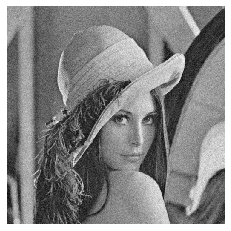

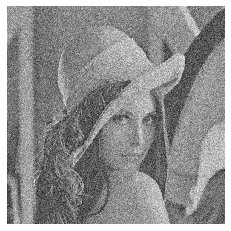

In [3]:
# Problem A: Gaussian Noise
gaussian_10 = GaussianNoise(img, 0, 1, 10)
gaussian_30 = GaussianNoise(img, 0, 1, 30)
print("SNR of gaussian_10:", SNR(img, gaussian_10))
print("SNR of gaussian_30:", SNR(img, gaussian_30))
cv2.imwrite("res/a/gaussian_10.png", gaussian_10)
cv2.imwrite("res/a/gaussian_30.png", gaussian_30)
plt.axis('off')
plt.imshow(gaussian_10, cmap='gray')
plt.show()
plt.axis('off')
plt.imshow(gaussian_30, cmap='gray')
plt.show()

SNR of saltpepper_05: 0.9183728229017984
SNR of saltpepper_10: -2.0792294087949004


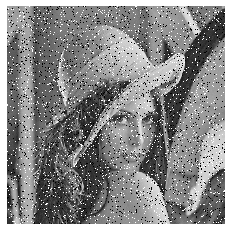

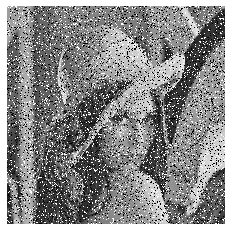

In [4]:
# Problem B: Salt&Pepper Noise
saltpepper_05 = SaltPepperNoise(img, 0.05)
saltpepper_10 = SaltPepperNoise(img, 0.10)
print("SNR of saltpepper_05:", SNR(img, saltpepper_05))
print("SNR of saltpepper_10:", SNR(img, saltpepper_10))
cv2.imwrite("res/b/saltpepper_05.png", saltpepper_05)
cv2.imwrite("res/b/saltpepper_10.png", saltpepper_10)
plt.axis('off')
plt.imshow(saltpepper_05, cmap='gray')
plt.show()
plt.axis('off')
plt.imshow(saltpepper_10, cmap='gray')
plt.show()

SNR of box_3_gaussian10: 17.727336859947375


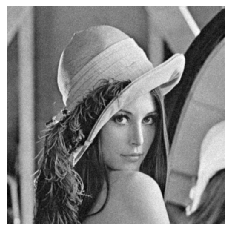

SNR of box_3_gaussian30: 12.538914176760418


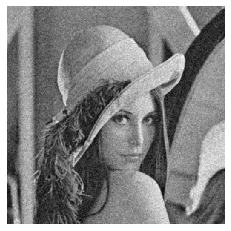

SNR of box_3_saltpepper05: 9.42579989381387


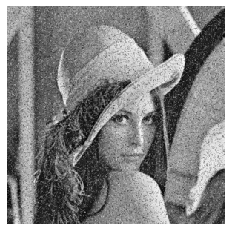

SNR of box_3_saltpepper10: 6.382717374015606


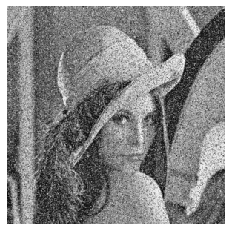

In [18]:
# Problem C: Box Filter 3x3

# Gaussian 10
box_3_gaussian10 = BoxFilter(gaussian_10, 3)
print("SNR of box_3_gaussian10:", SNR(img, box_3_gaussian10))
cv2.imwrite("res/c/box_3_gaussian10.png", box_3_gaussian10)
plt.axis('off')
plt.imshow(box_3_gaussian10, cmap='gray')
plt.show()

# Gaussian 30
box_3_gaussian30 = BoxFilter(gaussian_30, 3)
print("SNR of box_3_gaussian30:", SNR(img, box_3_gaussian30))
cv2.imwrite("res/c/box_3_gaussian30.png", box_3_gaussian30)
plt.axis('off')
plt.imshow(box_3_gaussian30, cmap='gray')
plt.show()

# Salt Pepper 05
box_3_saltpepper05 = BoxFilter(saltpepper_05, 3)
print("SNR of box_3_saltpepper05:", SNR(img, box_3_saltpepper05))
cv2.imwrite("res/c/box_3_saltpepper05.png", box_3_saltpepper05)
plt.axis('off')
plt.imshow(box_3_saltpepper05, cmap='gray')
plt.show()

# Salt Pepper 10
box_3_saltpepper10 = BoxFilter(saltpepper_10, 3)
print("SNR of box_3_saltpepper10:", SNR(img, box_3_saltpepper10))
cv2.imwrite("res/c/box_3_saltpepper10.png", box_3_saltpepper10)
plt.axis('off')
plt.imshow(box_3_saltpepper10, cmap='gray')
plt.show()

SNR of box_5_gaussian10: 14.86174805694938


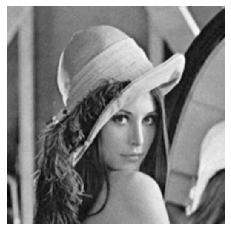

SNR of box_5_gaussian30: 13.315149839504967


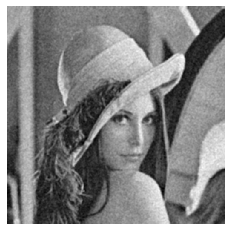

SNR of box_5_saltpepper05: 11.12830260215814


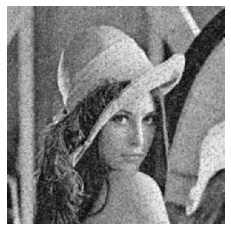

SNR of box_5_saltpepper10: 8.540053353128048


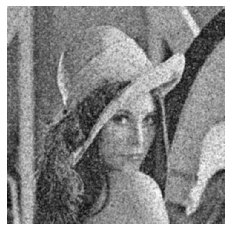

In [19]:
# Problem C: Box Filter 5x5

# Gaussian 10
box_5_gaussian10 = BoxFilter(gaussian_10, 5)
print("SNR of box_5_gaussian10:", SNR(img, box_5_gaussian10))
cv2.imwrite("res/c/box_5_gaussian10.png", box_5_gaussian10)
plt.axis('off')
plt.imshow(box_5_gaussian10, cmap='gray')
plt.show()

# Gaussian 30
box_5_gaussian30 = BoxFilter(gaussian_30, 5)
print("SNR of box_5_gaussian30:", SNR(img, box_5_gaussian30))
cv2.imwrite("res/c/box_5_gaussian30.png", box_5_gaussian30)
plt.axis('off')
plt.imshow(box_5_gaussian30, cmap='gray')
plt.show()

# Salt Pepper 05
box_5_saltpepper05 = BoxFilter(saltpepper_05, 5)
print("SNR of box_5_saltpepper05:", SNR(img, box_5_saltpepper05))
cv2.imwrite("res/c/box_5_saltpepper05.png", box_5_saltpepper05)
plt.axis('off')
plt.imshow(box_5_saltpepper05, cmap='gray')
plt.show()

# Salt Pepper 10
box_5_saltpepper10 = BoxFilter(saltpepper_10, 5)
print("SNR of box_5_saltpepper10:", SNR(img, box_5_saltpepper10))
cv2.imwrite("res/c/box_5_saltpepper10.png", box_5_saltpepper10)
plt.axis('off')
plt.imshow(box_5_saltpepper10, cmap='gray')
plt.show()

SNR of median_3_gaussian10: 17.62998629899334


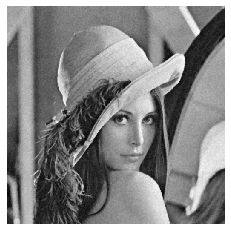

SNR of median_3_gaussian30: 11.074165496630622


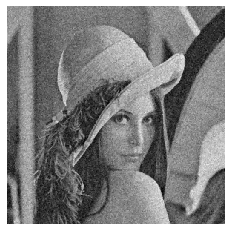

SNR of median_3_saltpepper05: 19.11894788420701


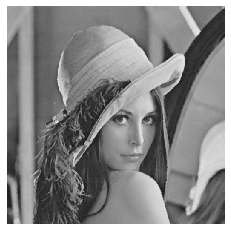

SNR of median_3_saltpepper10: 15.208334764430155


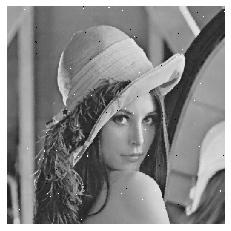

In [20]:
# Problem D: Median Filter 3x3

# Gaussian 10
median_3_gaussian10 = MedianFilter(gaussian_10, 3)
print("SNR of median_3_gaussian10:", SNR(img, median_3_gaussian10))
cv2.imwrite("res/d/median_3_gaussian10.png", median_3_gaussian10)
plt.axis('off')
plt.imshow(median_3_gaussian10, cmap='gray')
plt.show()

# Gaussian 30
median_3_gaussian30 = MedianFilter(gaussian_30, 3)
print("SNR of median_3_gaussian30:", SNR(img, median_3_gaussian30))
cv2.imwrite("res/d/median_3_gaussian30.png", median_3_gaussian30)
plt.axis('off')
plt.imshow(median_3_gaussian30, cmap='gray')
plt.show()

# Salt Pepper 05
median_3_saltpepper05 = MedianFilter(saltpepper_05, 3)
print("SNR of median_3_saltpepper05:", SNR(img, median_3_saltpepper05))
cv2.imwrite("res/d/median_3_saltpepper05.png", median_3_saltpepper05)
plt.axis('off')
plt.imshow(median_3_saltpepper05, cmap='gray')
plt.show()

# Salt Pepper 10
median_3_saltpepper10 = MedianFilter(saltpepper_10, 3)
print("SNR of median_3_saltpepper10:", SNR(img, median_3_saltpepper10))
cv2.imwrite("res/d/median_3_saltpepper10.png", median_3_saltpepper10)
plt.axis('off')
plt.imshow(median_3_saltpepper10, cmap='gray')
plt.show()

SNR of median_5_gaussian10: 16.016571024104763


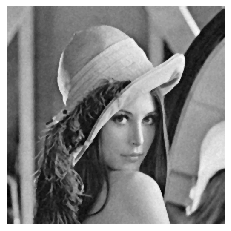

SNR of median_5_gaussian30: 12.898755414474405


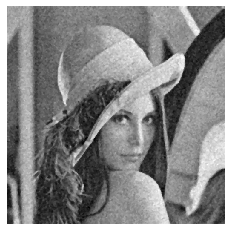

SNR of median_5_saltpepper05: 16.324705535510283


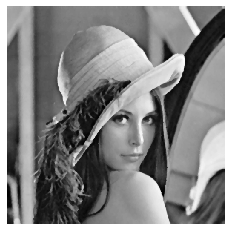

SNR of median_5_saltpepper10: 15.712610094036418


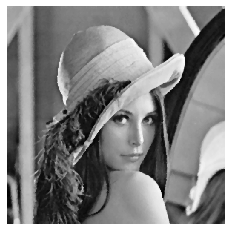

In [21]:
# Problem D: Median Filter 5x5

# Gaussian 10
median_5_gaussian10 = MedianFilter(gaussian_10, 5)
print("SNR of median_5_gaussian10:", SNR(img, median_5_gaussian10))
cv2.imwrite("res/d/median_5_gaussian10.png", median_5_gaussian10)
plt.axis('off')
plt.imshow(median_5_gaussian10, cmap='gray')
plt.show()

# Gaussian 30
median_5_gaussian30 = MedianFilter(gaussian_30, 5)
print("SNR of median_5_gaussian30:", SNR(img, median_5_gaussian30))
cv2.imwrite("res/d/median_5_gaussian30.png", median_5_gaussian30)
plt.axis('off')
plt.imshow(median_5_gaussian30, cmap='gray')
plt.show()

# Salt Pepper 05
median_5_saltpepper05 = MedianFilter(saltpepper_05, 5)
print("SNR of median_5_saltpepper05:", SNR(img, median_5_saltpepper05))
cv2.imwrite("res/d/median_5_saltpepper05.png", median_5_saltpepper05)
plt.axis('off')
plt.imshow(median_5_saltpepper05, cmap='gray')
plt.show()

# Salt Pepper 10
median_5_saltpepper10 = MedianFilter(saltpepper_10, 5)
print("SNR of median_5_saltpepper10:", SNR(img, median_5_saltpepper10))
cv2.imwrite("res/d/median_5_saltpepper10.png", median_5_saltpepper10)
plt.axis('off')
plt.imshow(median_5_saltpepper10, cmap='gray')
plt.show()

SNR of opentoclose_gaussian10: 13.24380950626756


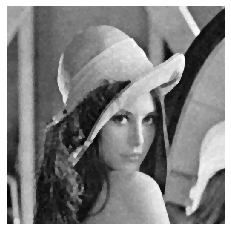

SNR of opentoclose_gaussian30: 11.161011106496144


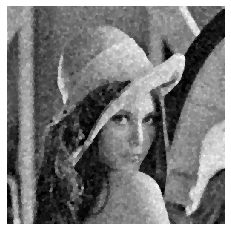

SNR of opentoclose_saltpepper05: 5.221519513579595


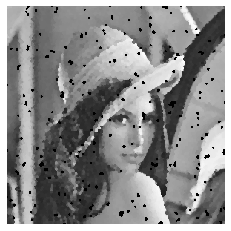

SNR of opentoclose_saltpepper10: -2.129574221364153


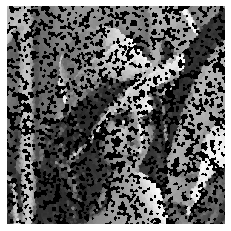

In [23]:
# Problem E: Opening->Closing
# Kernel
kernel = np.array([
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
])

# Gaussian 10
opentoclose_gaussian10 = OpentoCloseFunc(gaussian_10, kernel)
print("SNR of opentoclose_gaussian10:", SNR(img, opentoclose_gaussian10))
cv2.imwrite("res/e/opentoclose_gaussian10.png", opentoclose_gaussian10)
plt.axis('off')
plt.imshow(opentoclose_gaussian10, cmap='gray')
plt.show()

# Gaussian 30
opentoclose_gaussian30 = OpentoCloseFunc(gaussian_30, kernel)
print("SNR of opentoclose_gaussian30:", SNR(img, opentoclose_gaussian30))
cv2.imwrite("res/e/opentoclose_gaussian30.png", opentoclose_gaussian30)
plt.axis('off')
plt.imshow(opentoclose_gaussian30, cmap='gray')
plt.show()

# Salt Pepper 05
opentoclose_saltpepper05 = OpentoCloseFunc(saltpepper_05, kernel)
print("SNR of opentoclose_saltpepper05:", SNR(img, opentoclose_saltpepper05))
cv2.imwrite("res/e/opentoclose_saltpepper05.png", opentoclose_saltpepper05)
plt.axis('off')
plt.imshow(opentoclose_saltpepper05, cmap='gray')
plt.show()

# Salt Pepper 10
opentoclose_saltpepper10 = OpentoCloseFunc(saltpepper_10, kernel)
print("SNR of opentoclose_saltpepper10:", SNR(img, opentoclose_saltpepper10))
cv2.imwrite("res/e/opentoclose_saltpepper10.png", opentoclose_saltpepper10)
plt.axis('off')
plt.imshow(opentoclose_saltpepper10, cmap='gray')
plt.show()

SNR of closetoopen_gaussian10: 13.58871637708621


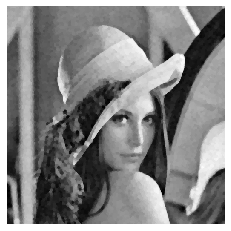

SNR of closetoopen_gaussian30: 11.174166816499644


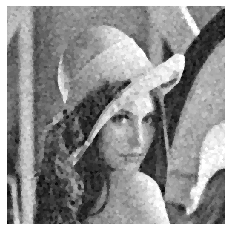

SNR of closetoopen_saltpepper05: 5.7890540624734275


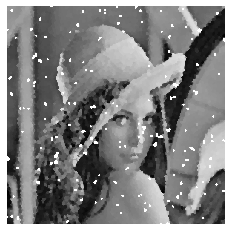

SNR of closetoopen_saltpepper10: -2.6272087689072072


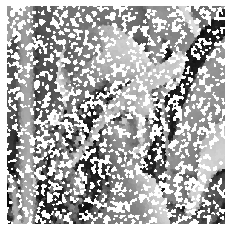

In [24]:
# Problem E: Closing->Opening

# Gaussian 10
closetoopen_gaussian10 = ClosetoOpenFunc(gaussian_10, kernel)
print("SNR of closetoopen_gaussian10:", SNR(img, closetoopen_gaussian10))
cv2.imwrite("res/e/closetoopen_gaussian10.png", closetoopen_gaussian10)
plt.axis('off')
plt.imshow(closetoopen_gaussian10, cmap='gray')
plt.show()

# Gaussian 30
closetoopen_gaussian30 = ClosetoOpenFunc(gaussian_30, kernel)
print("SNR of closetoopen_gaussian30:", SNR(img, closetoopen_gaussian30))
cv2.imwrite("res/e/closetoopen_gaussian30.png", closetoopen_gaussian30)
plt.axis('off')
plt.imshow(closetoopen_gaussian30, cmap='gray')
plt.show()

# Salt Pepper 05
closetoopen_saltpepper05 = ClosetoOpenFunc(saltpepper_05, kernel)
print("SNR of closetoopen_saltpepper05:", SNR(img, closetoopen_saltpepper05))
cv2.imwrite("res/e/closetoopen_saltpepper05.png", closetoopen_saltpepper05)
plt.axis('off')
plt.imshow(closetoopen_saltpepper05, cmap='gray')
plt.show()

# Salt Pepper 10
closetoopen_saltpepper10 = ClosetoOpenFunc(saltpepper_10, kernel)
print("SNR of closetoopen_saltpepper10:", SNR(img, closetoopen_saltpepper10))
cv2.imwrite("res/e/closetoopen_saltpepper10.png", closetoopen_saltpepper10)
plt.axis('off')
plt.imshow(closetoopen_saltpepper10, cmap='gray')
plt.show()